In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/workspaces/Practise-Code/Kaggle Project/Data/df_no_outliers.csv')

df.rename(columns={'date': 'date'}, inplace=True)

df['date'] = pd.to_datetime(df['date'])
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 19430 entries, 15924 to 8274
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19430 non-null  int64         
 1   date           19430 non-null  datetime64[ns]
 2   price          19430 non-null  float64       
 3   bedrooms       19430 non-null  int64         
 4   bathrooms      19430 non-null  float64       
 5   sqft_living    19430 non-null  int64         
 6   sqft_lot       19430 non-null  int64         
 7   floors         19430 non-null  float64       
 8   waterfront     19430 non-null  int64         
 9   view           19430 non-null  int64         
 10  condition      19430 non-null  int64         
 11  grade          19430 non-null  int64         
 12  sqft_above     19430 non-null  int64         
 13  sqft_basement  19430 non-null  int64         
 14  yr_built       19430 non-null  int64         
 15  yr_renovated   19430 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,decade_built
15924,7533800170,2014-07-07,1636000.0,3,2.50,3110,6765,2.0,0,1,...,560,1946,0,98115,47.6886,-122.276,2630,7626,7,1940
17324,9809000010,2015-01-06,1629000.0,5,2.50,3090,16583,2.0,0,0,...,0,1964,0,98004,47.6458,-122.218,3740,17853,1,1960
14233,5318101565,2014-07-03,1625000.0,4,3.25,2980,3600,2.0,0,0,...,830,1999,0,98112,47.6352,-122.284,2980,4800,7,1990
11843,2450500060,2014-08-26,1620000.0,4,3.25,3820,8114,2.0,0,0,...,0,2005,0,98004,47.5837,-122.194,2440,9195,8,2000
16268,3025300250,2015-05-13,1620000.0,4,2.25,2350,17709,2.0,0,0,...,0,1977,0,98039,47.6232,-122.236,3360,19855,5,1970


In [4]:
def years_since_completion_of_work(yr_renovated, yr_built):
    if yr_renovated == 0:
        return datetime.now().year - yr_built 
    else:
        return datetime.now().year - yr_renovated
    
df['years_since_completion_of_work'] = df.apply(lambda x: years_since_completion_of_work(x['yr_renovated'], x['yr_built']), axis=1)

df.head(100).sort_values(by='yr_renovated', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,decade_built,years_since_completion_of_work
19276,2397100705,2014-07-14,1518630.0,4,4.25,3650,5328,1.5,0,0,...,1907,2014,98119,47.6380,-122.362,1710,3600,7,1900,10
4743,31000165,2014-09-11,1490000.0,5,3.50,3620,7821,2.0,0,2,...,1958,2010,98040,47.5738,-122.215,2690,9757,9,1950,14
2781,5701500030,2014-06-01,1505000.0,4,3.50,3480,7232,2.0,0,0,...,1926,2010,98144,47.5859,-122.291,2380,5642,6,1920,14
9556,3179100180,2015-05-07,1540000.0,5,3.25,2920,6960,2.0,0,1,...,1953,2008,98105,47.6712,-122.272,2470,6735,5,1950,16
18005,5494000040,2014-12-01,1444000.0,4,2.75,2660,9547,1.0,0,1,...,1968,2006,98004,47.6160,-122.218,2410,10001,12,1960,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3526,6448000090,2014-05-12,1575000.0,5,2.75,3650,20150,1.0,0,0,...,1975,0,98004,47.6215,-122.224,3220,19800,5,1970,49
20144,5021900635,2014-10-28,1575000.0,3,2.00,3620,14250,2.0,0,0,...,2007,0,98040,47.5767,-122.225,2370,14250,10,2000,17
3821,5452301810,2014-09-05,1575000.0,5,3.75,4220,9240,2.0,0,2,...,1991,0,98040,47.5895,-122.229,3380,9240,9,1990,33
1894,3066120030,2015-01-27,1575000.0,4,3.75,3810,9916,2.0,0,0,...,1989,0,98040,47.5739,-122.234,3040,11250,1,1980,35


In [5]:
df['renovation_status'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [6]:
df['total_bathrooms'] = df['bathrooms'].round()

In [7]:
df['house_age'] = 2024 - df['yr_built']

In [8]:
df.to_csv('/workspaces/Practise-Code/Kaggle Project/Data/new_features.csv')

In [9]:
num_cols_to_scale = [
    'price', 'bedrooms', 'total_bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition',
    'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 
    'years_since_completion_of_work', 'house_age'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

# Display the scaled DataFrame
print(df.head())

               id       date     price  bedrooms  bathrooms  sqft_living  \
15924  7533800170 2014-07-07  4.889542 -0.381211       2.50     1.564563   
17324  9809000010 2015-01-06  4.859794  1.967587       2.50     1.537509   
14233  5318101565 2014-07-03  4.842795  0.793188       3.25     1.388713   
11843  2450500060 2014-08-26  4.821546  0.793188       3.25     2.524971   
16268  3025300250 2015-05-13  4.821546  0.793188       2.25     0.536520   

       sqft_lot    floors  waterfront      view  ...       lat      long  \
15924 -0.267760  0.963663           0  2.209684  ...  0.912081 -0.416417   
17324  0.586251  0.963663           0 -0.233922  ...  0.605803  0.034796   
14233 -0.543064  0.963663           0 -0.233922  ...  0.529949 -0.478653   
11843 -0.150418  0.963663           0 -0.233922  ...  0.161412  0.221504   
16268  0.684195  0.963663           0 -0.233922  ...  0.444076 -0.105236   

       sqft_living15  sqft_lot15  month  decade_built  \
15924       1.212841   -0.161

In [10]:
df.to_csv('/workspaces/Practise-Code/Kaggle Project/Data/scaled_data.csv')

<Axes: >

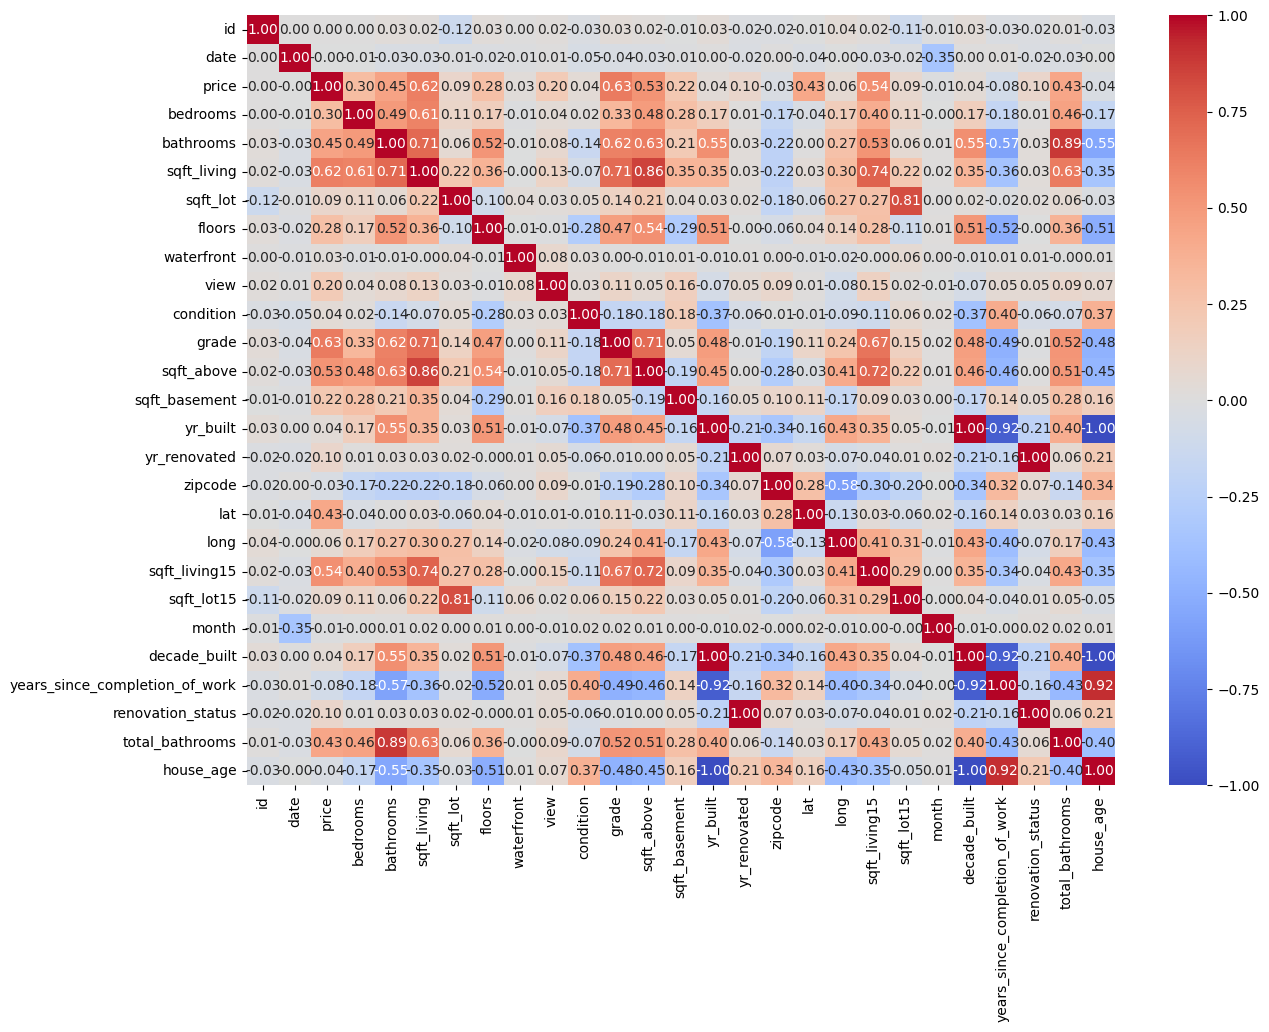

In [11]:
corr_matrix = df.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

In [13]:
# Identifying highly correlated pairs (above a certain threshold)
threshold = 0.8
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold]

print("Highly correlated pairs:\n", high_corr_pairs)


Highly correlated pairs:
 [('bathrooms', 'total_bathrooms'), ('sqft_living', 'sqft_above'), ('sqft_lot', 'sqft_lot15'), ('sqft_above', 'sqft_living'), ('yr_built', 'decade_built'), ('yr_built', 'years_since_completion_of_work'), ('yr_built', 'house_age'), ('yr_renovated', 'renovation_status'), ('sqft_lot15', 'sqft_lot'), ('decade_built', 'yr_built'), ('decade_built', 'years_since_completion_of_work'), ('decade_built', 'house_age'), ('years_since_completion_of_work', 'yr_built'), ('years_since_completion_of_work', 'decade_built'), ('years_since_completion_of_work', 'house_age'), ('renovation_status', 'yr_renovated'), ('total_bathrooms', 'bathrooms'), ('house_age', 'yr_built'), ('house_age', 'decade_built'), ('house_age', 'years_since_completion_of_work')]


In [17]:
drop_data = ['bathrooms', 'sqft_above', 'sqft_lot15', 'decade_built', 'house_age', 'yr_built', 'yr_renovated']

for data in drop_data:
    df.drop(data, axis=1, inplace=True)

In [18]:
df.head()

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_living15,month,years_since_completion_of_work,renovation_status,total_bathrooms
15924,7533800170,2014-07-07,4.889542,-0.381211,1.564563,-0.267760,0.963663,0,2.209684,0.907301,1.432283,0.772764,98115,0.912081,-0.416417,1.212841,7,0.922313,0,0.023372
17324,9809000010,2015-01-06,4.859794,1.967587,1.537509,0.586251,0.963663,0,-0.233922,0.907301,1.432283,-0.664566,98004,0.605803,0.034796,3.072068,1,0.300763,0,0.023372
14233,5318101565,2014-07-03,4.842795,0.793188,1.388713,-0.543064,0.963663,0,-0.233922,-0.643853,1.432283,1.465763,98112,0.529949,-0.478653,1.799084,7,-0.907807,0,1.527055
11843,2450500060,2014-08-26,4.821546,0.793188,2.524971,-0.150418,0.963663,0,-0.233922,-0.643853,2.409297,-0.664566,98004,0.161412,0.221504,0.894595,8,-1.114991,0,1.527055
16268,3025300250,2015-05-13,4.821546,0.793188,0.536520,0.684195,0.963663,0,-0.233922,0.907301,1.432283,-0.664566,98039,0.444076,-0.105236,2.435576,5,-0.148135,0,0.023372


In [19]:
df.to_csv('/workspaces/Practise-Code/Kaggle Project/Data/selected_scaled_data.csv')

<Axes: >

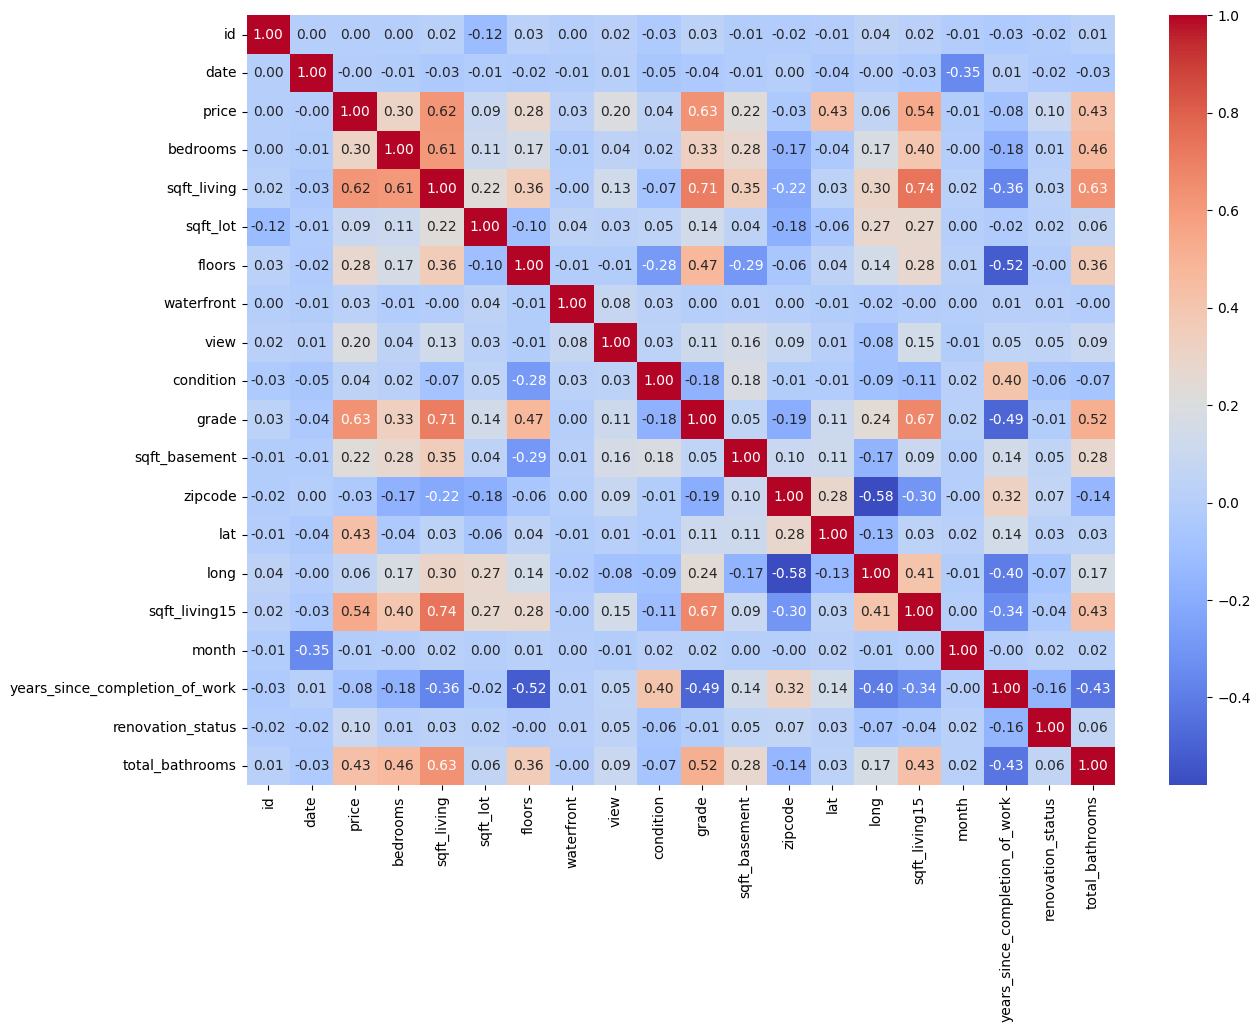

In [20]:
corr_matrix = df.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})